import numpy as np
SNR_db_list = np.arange(0,51,5)
print(SNR_db_list)

In [7]:
linear_list = []
for item in SNR_db_list:
    linearval = 10**(item/10)
    linear_list.append(linearval)
print(linear_list)

[1.0, 3.1622776601683795, 10.0, 31.622776601683793, 100.0, 316.22776601683796, 1000.0, 3162.2776601683795, 10000.0, 31622.776601683792, 100000.0]


In [8]:
rounded_list = [round(elem,2) for elem in linear_list]
one_plus_SNR_linear = [x+1 for x in rounded_list]
print(one_plus_SNR_linear)

[2.0, 4.16, 11.0, 32.620000000000005, 101.0, 317.23, 1001.0, 3163.28, 10001.0, 31623.78, 100001.0]


In [9]:
import math
C_over_B_list = [(math.log10(x)/0.3) for x in one_plus_SNR_linear]
C_over_B_rounded = [round(elem,2) for elem in C_over_B_list]
print(C_over_B_rounded)

[1.0, 2.06, 3.47, 5.04, 6.68, 8.34, 10.0, 11.67, 13.33, 15.0, 16.67]


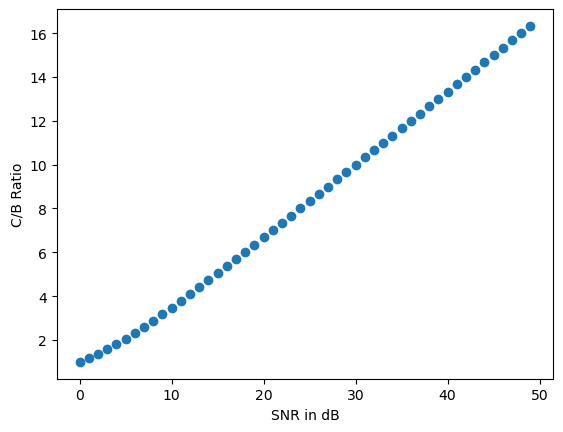

In [6]:
import matplotlib.pyplot as plt
plt.scatter(x = SNR_db_list, y = C_over_B_rounded)
plt.xlabel("SNR in dB")
plt.ylabel("C/B Ratio")
plt.show()

In [52]:
# Exercise of Experiment no-3 MTC

import sympy as sym

t = sym.symbols('t')

signal = sym.Piecewise(     (-t-2,((-2 <= t)&(t<= -1))),   (t,((-1 <= t)&(t<= 1))) , (-t+2,((1 <= t)&(t<= 2))) )   

series = sym.fourier_series(signal,(t,-2,2))
series.truncate(4)


8*sin(pi*t/2)/pi**2 - 8*sin(3*pi*t/2)/(9*pi**2) + 8*sin(5*pi*t/2)/(25*pi**2) - 8*sin(7*pi*t/2)/(49*pi**2)

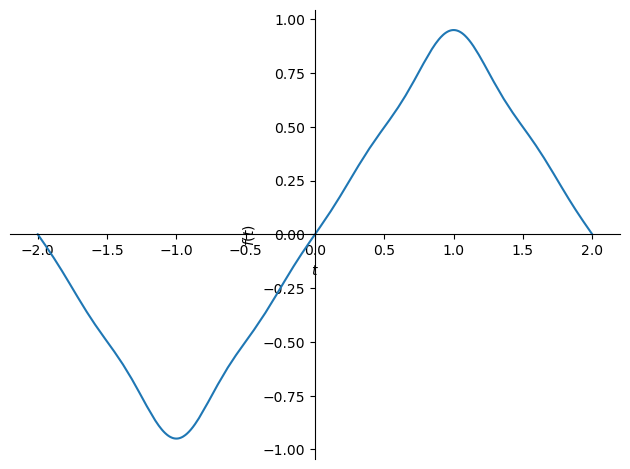

In [53]:
sym.plot(series.truncate(4),(t,-2,2))

In [1]:
import sympy as sym

In [2]:
from sympy import pi

In [3]:
t = sym.symbols('t')

In [4]:
x = sym.Piecewise((-1,t<0),(1,t>0))

In [5]:
series = sym.fourier_series(x,(t,-pi,pi))

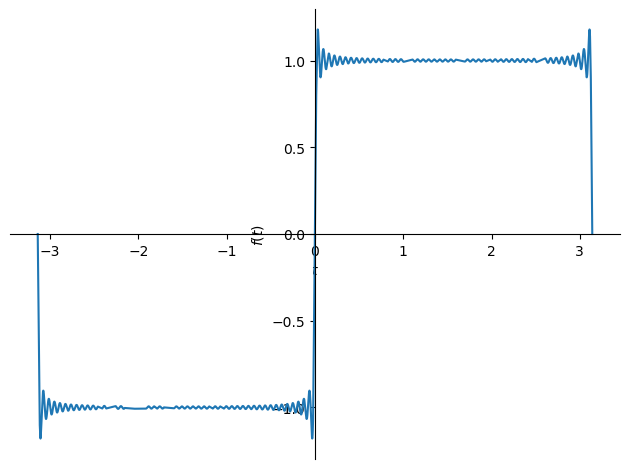

In [6]:
sym.plot(series.truncate(50),(t,-pi,pi))

In [7]:
series.truncate(3)

4*sin(t)/pi + 4*sin(3*t)/(3*pi) + 4*sin(5*t)/(5*pi)

## Experiment-4 MTC (Fourier Transform)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
sampling_f = 100 # deciding sampling frequency as per given signals
sampling_t = 1.0/sampling_f # sampling time

time_interval = np.arange(0,1,sampling_t) # create timing range

freq1 = 1  #  frequency 1 Hz
x1 = 3*np.sin(2*np.pi*freq1*time_interval) # first signal

freq2= 4 # frequency 4 Hz
x2 = np.sin(2*np.pi*freq2*time_interval) # second signal

freq3 = 7 # frequency 7 Hz
x3 = 0.5*np.sin(2*np.pi*freq3*time_interval) # third signal

x = x1 + x2 + x3  # combining all three signals into one signal
print(x)


[ 0.00000000e+00  6.49951092e-01  1.24301000e+00  1.73098263e+00
  2.08154121e+00  2.28261600e+00  2.34327722e+00  2.29102039e+00
  2.16602580e+00  2.01350931e+00  1.87561275e+00  1.78433917e+00
  1.75681059e+00  1.79365925e+00  1.88074856e+00  1.99377423e+00
  2.10474409e+00  2.18898123e+00  2.23120727e+00  2.22945607e+00
  2.19600566e+00  2.15511222e+00  2.13796970e+00  2.17587843e+00
  2.29297677e+00  2.50000000e+00  2.79035655e+00  3.13938578e+00
  3.50706391e+00  3.84376807e+00  4.09811869e+00  4.22550953e+00
  4.19578177e+00  3.99863534e+00  3.64577057e+00  3.16934473e+00
  2.61699766e+00  2.04432572e+00  1.50614412e+00  1.04809007e+00
  7.00042246e-01  4.72482828e-01  3.56371693e-01  3.26445884e-01
  3.47223767e-01  3.80502964e-01  3.92885361e-01  3.61888418e-01
  2.79502648e-01  1.52571317e-01  3.06161700e-16 -1.52571317e-01
 -2.79502648e-01 -3.61888418e-01 -3.92885361e-01 -3.80502964e-01
 -3.47223767e-01 -3.26445884e-01 -3.56371693e-01 -4.72482828e-01
 -7.00042246e-01 -1.04809

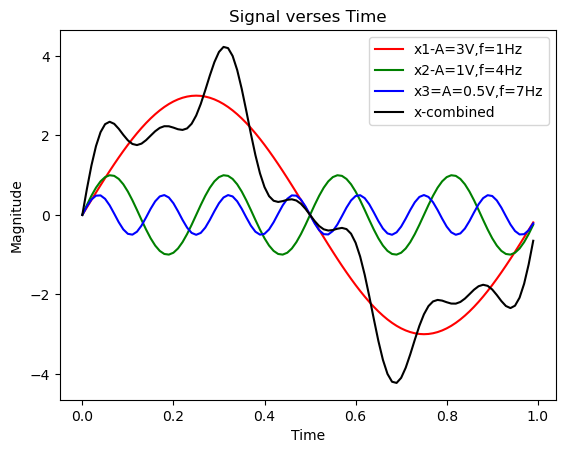

In [3]:
plt.plot(time_interval,x1,color='r',label='x1-A=3V,f=1Hz')
plt.plot(time_interval,x2,color='g',label='x2-A=1V,f=4Hz')
plt.plot(time_interval,x3,color='b',label='x3=A=0.5V,f=7Hz')
plt.plot(time_interval,x,color='k',label='x-combined')
plt.xlabel("Time")
plt.ylabel("Magnitude")
plt.title("Signal verses Time")
plt.legend()


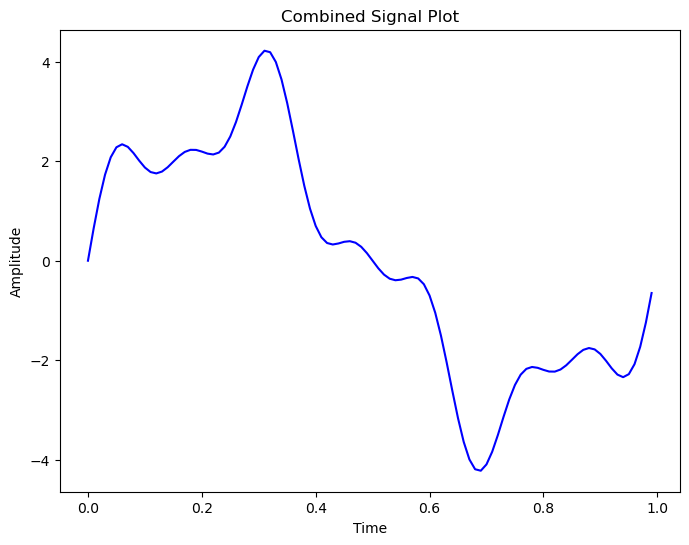

In [4]:
plt.figure(figsize=(8,6))
plt.plot(time_interval,x,'b')  # plot combined signal verses time
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Combined Signal Plot")
plt.show()

In [5]:
# writing a function to calculate DFT of signal x
def DFT(x):
    N = len(x)       # 100 points
    n = np.arange(N) # (n = 0 to n = 99)
    k = n.reshape((N,1))  # row to column transform for total 100 points
    e = np.exp(-2j*np.pi*k*n/N) # calculate complex exponent
    X = np.dot(e,x)  # calcuates DFT
    return X

In [6]:
output = DFT(x) # passing combined signal to DFT function
N = len(x)
n = np.arange(N)
T = N/sampling_f
freq = n/T

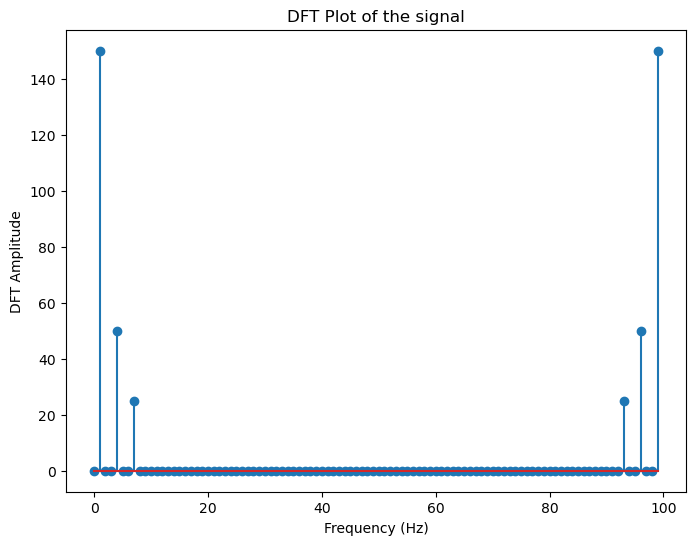

In [7]:
plt.figure(figsize=(8,6))
plt.stem(freq,abs(output))
plt.xlabel("Frequency (Hz)")
plt.ylabel("DFT Amplitude")
plt.title("DFT Plot of the signal")
plt.show()

Text(0.5, 1.0, 'DFT Plot of the combined signal')

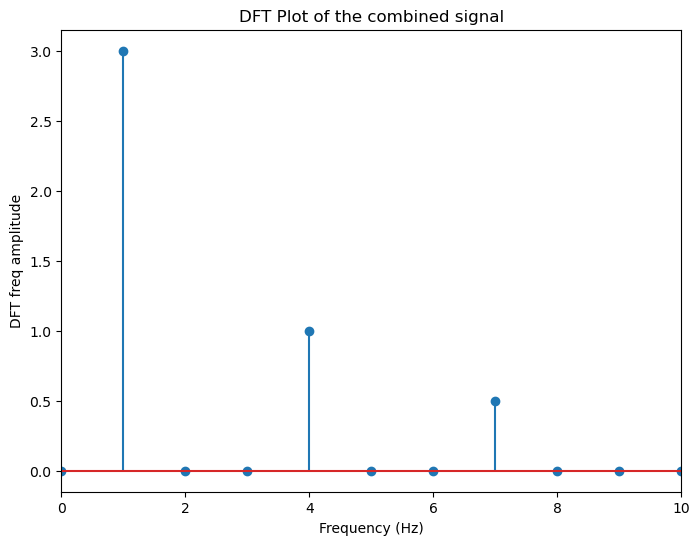

In [8]:
N_onesided = N // 2    # take half of N
f_onesided = freq[:N_onesided]  # take half of f

output_onesided = output[:N_onesided]/N_onesided

plt.figure(figsize=(8,6))
plt.stem(f_onesided,abs(output_onesided))
plt.xlabel("Frequency (Hz)")
plt.ylabel("DFT freq amplitude")
plt.xlim(0,10)
plt.title("DFT Plot of the combined signal")

In [9]:
import sympy as sym
from IPython.display import display,Math
sym.init_printing()

In [10]:
pi,t = sym.symbols('pi,t')

In [16]:
signal = (3*sym.sin(2*pi*4*t)) + (4*sym.sin(2*pi*8*t)) + (0.5*sym.sin(2*pi*10*t))
display(signal)

In [17]:
display(Math(sym.latex(sym.simplify(signal))))

<IPython.core.display.Math object>

In [34]:
import sympy as sym
t = sym.symbols('t')

signal = sym.Piecewise(     (t,((0 < t)&(t<= 1))),   (2,((1 < t)&(t<= 2))) , (3,((2 < t)&(t<= 3))), (2,((3 < t)&(t<= 4))), (-t+5,((4 < t)&(t<= 5))) )   

series = sym.fourier_series(signal,(t,0,5))
series.truncate(5)


2*(-5*sqrt(sqrt(5)/8 + 5/8)/pi - 25/(2*pi**2) - 5*sqrt(5/8 - sqrt(5)/8)/pi + 25*(-1/4 + sqrt(5)/4)/(2*pi**2))*cos(2*pi*t/5)/5 + 2*(-5*sqrt(5/8 - sqrt(5)/8)/(2*pi) - 25/(8*pi**2) + 25*(-sqrt(5)/4 - 1/4)/(8*pi**2) + 5*sqrt(sqrt(5)/8 + 5/8)/(2*pi))*cos(4*pi*t/5)/5 + 2*(-5*sqrt(sqrt(5)/8 + 5/8)/(3*pi) - 25/(18*pi**2) + 25*(-sqrt(5)/4 - 1/4)/(18*pi**2) + 5*sqrt(5/8 - sqrt(5)/8)/(3*pi))*cos(6*pi*t/5)/5 + 2*(-25/(32*pi**2) + 25*(-1/4 + sqrt(5)/4)/(32*pi**2) + 5*sqrt(5/8 - sqrt(5)/8)/(4*pi) + 5*sqrt(sqrt(5)/8 + 5/8)/(4*pi))*cos(8*pi*t/5)/5 + 8/5

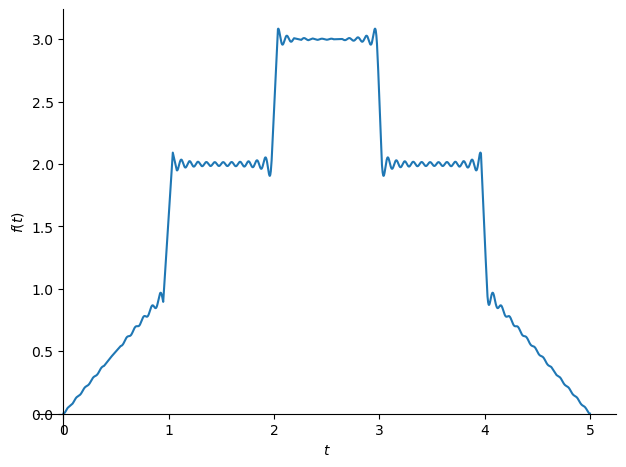

In [37]:
sym.plot(series.truncate(50),(t,0,5))

## Experiment-4 Exercise Solution

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
sampling_f = 200  # sampling frequency 120 Hz
sampling_t = 1.0/sampling_f  # sampling time

In [15]:
# creating timing interval
time_interval = np.arange(0,1,sampling_t)

In [16]:
# creating multiple signals with different frequencies

freq1 = 20  #  frequency 20 Hz
x1 = 15*np.sin(2*np.pi*freq1*time_interval) # first signal

freq2= 40 # frequency 40 Hz
x2 = 15*np.sin(2*np.pi*freq2*time_interval) # second signal

freq3 = 60 # frequency 60 Hz
x3 = 15*np.sin(2*np.pi*freq3*time_interval) # third signal

freq4 = 80 # frequency 80 Hz
x4 = 15*np.sin(2*np.pi*freq4*time_interval) # fourth signal

# combined signal

x = x1 + x2 + x3 + x4

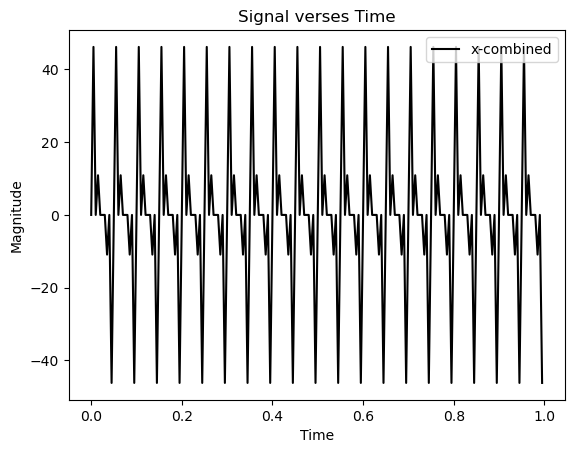

In [17]:
plt.plot(time_interval,x,color='k',label='x-combined')
plt.xlabel("Time")
plt.ylabel("Magnitude")
plt.title("Signal verses Time")
plt.legend()


In [18]:
print(len(x))

200


In [19]:
# writing a function to calculate DFT of signal x
def DFT(x):
    N = len(x)       # 100 points
    n = np.arange(N) # (n = 0 to n = 99)
    k = n.reshape((N,1))  # row to column transform for total 100 points
    e = np.exp(-2j*np.pi*k*n/N) # calculate complex exponent
    X = np.dot(e,x)  # calcuates DFT
    return X

In [20]:
output = DFT(x) # passing combined signal to DFT function
N = len(x)
n = np.arange(N)
T = N/sampling_f
freq = n/T

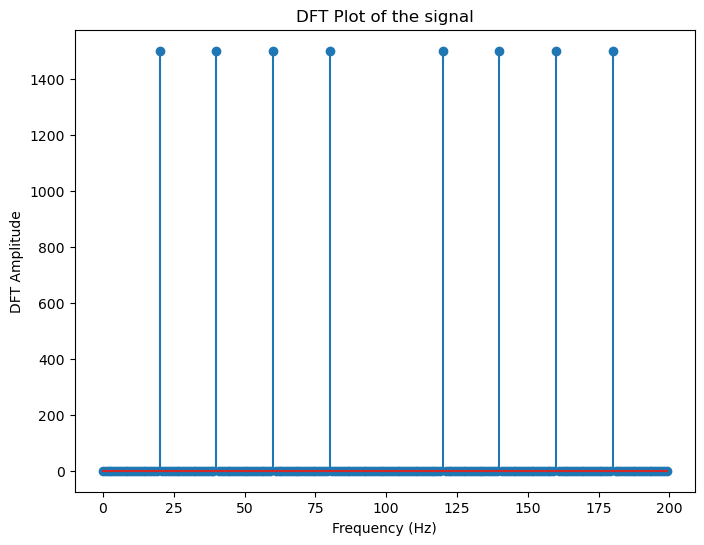

In [21]:
plt.figure(figsize=(8,6))
plt.stem(freq,abs(output))
plt.xlabel("Frequency (Hz)")
plt.ylabel("DFT Amplitude")
plt.title("DFT Plot of the signal")
plt.show()

Text(0.5, 1.0, 'DFT Plot of the combined signal')

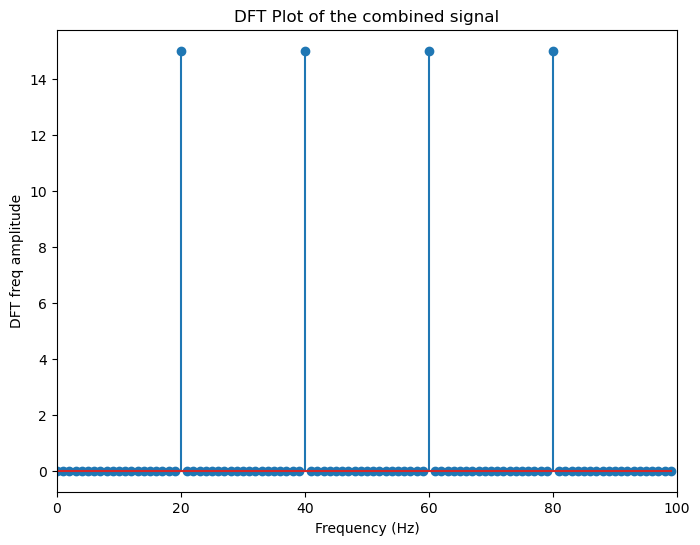

In [24]:
N_onesided = N // 2    # take half of N
f_onesided = freq[:N_onesided]  # take half of f

output_onesided = output[:N_onesided]/N_onesided

plt.figure(figsize=(8,6))
plt.stem(f_onesided,abs(output_onesided))
plt.xlabel("Frequency (Hz)")
plt.ylabel("DFT freq amplitude")
plt.xlim(0,100)
plt.title("DFT Plot of the combined signal")

## Experiment-6 Demonstration

In [2]:
import numpy as np
from numpy.linalg import eig

# input the data matrix A

A = np.array([ [1,3], [2,2]])  # 2 x 2 data matrix A

print("Original Data Matrix: \nA\n = ", A)

eigenvalue,eigenvector = eig(A)

print("\nEigen Values: ", eigenvalue)
print("\nEigen Vectors: ", eigenvector)

# converting eigen vector into 2x2 matrix
C = np.reshape(eigenvector, (2,2))

print("\nEigen Vector matrix: \nC\n = ",C)

# calculate inverse of eigen vector matrix

eigenvect_inv = np.linalg.inv(C)
print("\nInverse Eigen vector Matrix: \nC^-1\n = ", eigenvect_inv)


# perform matrix multiplication (c^-1 x A)
first_multiplication = np.dot(eigenvect_inv, A)

# perform matrix multiplication (C^1 x A x C)
D = np.dot(first_multiplication, C)

print("\nDiagonalized transformed vector: \nD \n= ", np.around(D,2))


Original Data Matrix: 
A
 =  [[1 3]
 [2 2]]

Eigen Values:  [-1.  4.]

Eigen Vectors:  [[-0.83205029 -0.70710678]
 [ 0.5547002  -0.70710678]]

Eigen Vector matrix: 
C
 =  [[-0.83205029 -0.70710678]
 [ 0.5547002  -0.70710678]]

Inverse Eigen vector Matrix: 
C^-1
 =  [[-0.72111026  0.72111026]
 [-0.56568542 -0.84852814]]

Diagonalized transformed vector: 
D 
=  [[-1.  0.]
 [ 0.  4.]]


## Experiment-8 Demonstration

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

Text(0, 0.5, 'Magnitude')

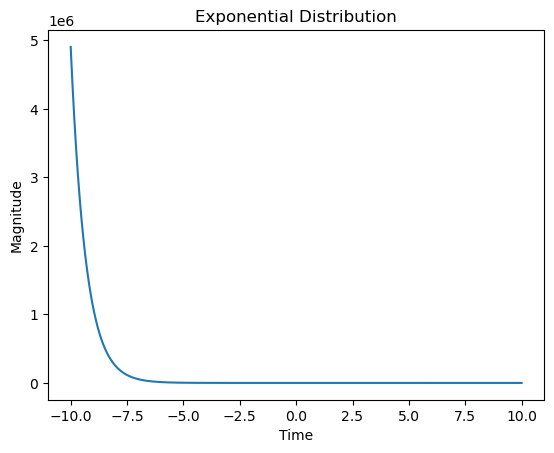

In [3]:
t1 = np.linspace(-10,10,1000)
fx = 1.5*np.exp(-1.5*t1)
plt.plot(t1,fx)
plt.title('Exponential Distribution')
plt.xlabel('Time')
plt.ylabel('Magnitude')

In [8]:
lam = 5
x = np.arange(0,50)
pmf_values = poisson.pmf(x,lam)

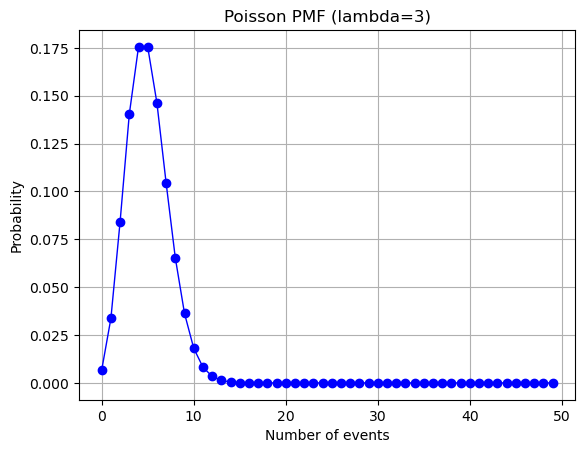

In [9]:
plt.plot(x, pmf_values, 'bo-', linewidth=1)
plt.xlabel('Number of events')
plt.ylabel('Probability')
plt.title('Poisson PMF (lambda=3)')
plt.grid(True)
plt.show()

In [9]:
# Exercise solution-Experiment 8

from scipy.stats import norm
import statistics

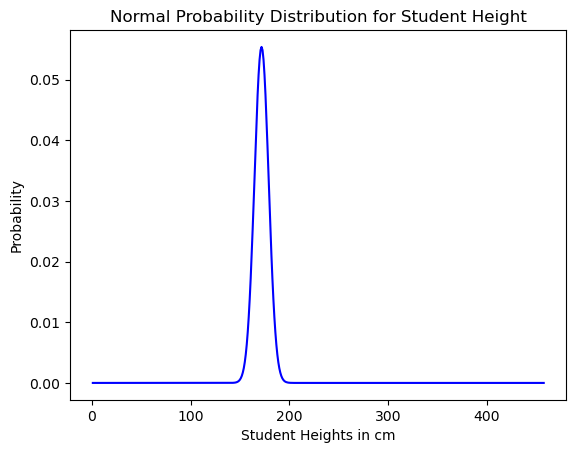

In [20]:
x1 = np.arange(1,459,1)

mean = 172
sd = 7.2

y1 = norm.pdf(x1, mean, sd)

x2 = np.arange(mean-3*7.2,mean+3*7.2,1)
y2 = norm.pdf(x2, mean, sd)

plt.plot(x1, y1, color='b')
plt.xlabel("Student Heights in cm")
plt.ylabel("Probability")
plt.title("Normal Probability Distribution for Student Height")
plt.show()


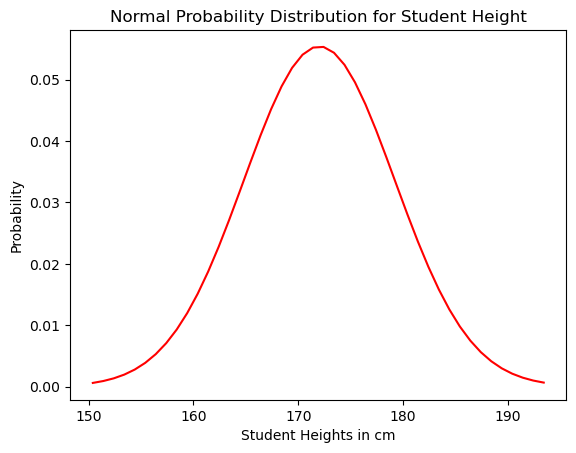

In [21]:
plt.plot(x2, y2, color='r')
plt.xlabel("Student Heights in cm")
plt.ylabel("Probability")
plt.title("Normal Probability Distribution for Student Height")
plt.show()

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("E:\Surfactant Modelling\Work\RepeatSamples.csv")

In [3]:
df.head()

,DateTime,Number,OperatorID,MachineID,SampleID,Concentration,Solvent_amount,Temperature,TDS,Conductivity
0,2023-10-05T08:52:34+00:00,1,2,1,5.21,10,100,27.62,122.46,191.35
1,2023-10-05T08:52:49+00:00,2,2,1,5.21,10,100,28.81,119.76,187.12
2,2023-10-05T08:53:05+00:00,3,2,1,5.21,10,100,28.94,121.14,189.28
3,2023-10-05T08:53:20+00:00,4,2,1,5.21,10,100,28.94,119.48,186.69
4,2023-10-05T08:53:36+00:00,5,2,1,5.21,10,100,28.87,121.28,189.50


In [4]:
df.describe()

,Number,OperatorID,MachineID,SampleID,Concentration,Solvent_amount,Temperature,TDS,Conductivity
count,5356.000000,5356.0,5356.000000,5356.000000,5356.000000,5356.0,5356.000000,5356.000000,5356.000000
mean,2678.500000,2.0,1.947722,3.785429,102.074309,100.0,25.351088,625.267086,976.979974
std,1546.288352,0.0,0.805370,1.730839,57.898547,0.0,2.253402,331.606908,518.136151
min,1.000000,2.0,1.000000,0.210000,0.000000,100.0,17.370000,26.680000,41.690000
25%,1339.750000,2.0,1.000000,2.210000,50.000000,100.0,24.060000,340.380000,531.840000
50%,2678.500000,2.0,2.000000,4.210000,100.000000,100.0,25.560000,618.315000,966.120000
75%,4017.250000,2.0,3.000000,5.210000,150.000000,100.0,27.250000,931.120000,1454.870000
max,5356.000000,2.0,3.000000,6.210000,200.000000,100.0,30.690000,1280.410000,2000.640000


## Matrix Diagonlization Experiment Exercise

In [1]:
import numpy as np
from numpy.linalg import eig

In [11]:
A = np.array([[1,2,-1],[2, -2, 1],[-3, 2, 1]])
print("Original Data Matrix: \nA\n = ", A)

Original Data Matrix: 
A
 =  [[ 1  2 -1]
 [ 2 -2  1]
 [-3  2  1]]


In [12]:
eigenvalue,eigenvector = eig(A)
print("\nEigen Values: ", eigenvalue)
print("\nEigen Vectors: ", eigenvector)


Eigen Values:  [-3.8844837   2.76873431  1.1157494 ]

Eigen Vectors:  [[ 0.4104318  -0.5290818   0.26269152]
 [-0.72740968 -0.04419293  0.4436271 ]
 [ 0.54992808  0.84741928  0.85684781]]


In [13]:
C = np.reshape(eigenvector, (3,3))

In [14]:
print("\nEigen Vector matrix: \nC\n = ",C)



Eigen Vector matrix: 
C
 =  [[ 0.4104318  -0.5290818   0.26269152]
 [-0.72740968 -0.04419293  0.4436271 ]
 [ 0.54992808  0.84741928  0.85684781]]


In [15]:
eigenvect_inv = np.linalg.inv(C)
print("\nInverse Eigen vector Matrix: \nC^-1\n = ", eigenvect_inv)


Inverse Eigen vector Matrix: 
C^-1
 =  [[ 0.52766064 -0.86193666  0.28449216]
 [-1.10585887 -0.26423041  0.47583657]
 [ 0.75503575  0.81451701  0.5138797 ]]


In [16]:
first_multiplication = np.dot(eigenvect_inv, A)

In [17]:
D = np.dot(first_multiplication, C)
print("\nDiagonalized transformed vector: \nD \n= ", np.around(D,2))


Diagonalized transformed vector: 
D 
=  [[-3.88  0.    0.  ]
 [ 0.    2.77  0.  ]
 [-0.   -0.    1.12]]


In [1]:
import pandas as pd

In [4]:
conda install xlrd

Retrieving notices: ...working... done
Channels:
 - conda-forge
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\saumi\anaconda3

  added / updated specs:
    - xlrd


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.2.2   |       h56e8100_0         152 KB  conda-forge
    certifi-2024.2.2           |     pyhd8ed1ab_0         157 KB  conda-forge
    openssl-3.2.1              |       hcfcfb64_1         7.8 MB  conda-forge
    xlrd-2.0.1                 |     pyhd8ed1ab_3          92 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         8.2 MB

The following NEW packages will be INSTALLED:

  xlrd               conda-forge/noarch::xlrd-2.0.1-pyhd8ed1ab_3 

The following packages will be UPDATED:

  ca-certificate

In [5]:
df = pd.read_excel('D:\Data Analytics\Optimization with Python - Udemy\data.xlsx')

In [6]:
print(df)

      name  age
0   rafael   15
1  gabriel   10
2    maria   18
3    peter   12
4      ana   11
5     john   19


In [7]:
df = pd.read_excel('D:\Data Analytics\Optimization with Python - Udemy\data.xlsx',sheet_name = 'marks')

In [8]:
print(df)

       name  test  mark
0    rafael     1     7
1   gabriel     1     4
2     maria     1     9
3     peter     1     8
4       ana     1     7
5      john     1    10
6    rafael     2    10
7   gabriel     2     8
8     maria     2     6
9     peter     2     9
10      ana     2     8
11     john     2     6


In [9]:
df = pd.read_excel('D:\Data Analytics\Optimization with Python - Udemy\data.xlsx',sheet_name = 'people')
print(df)

      name  age
0   rafael   15
1  gabriel   10
2    maria   18
3    peter   12
4      ana   11
5     john   19


In [11]:
dfMarks = pd.read_excel('D:\Data Analytics\Optimization with Python - Udemy\data.xlsx',sheet_name = 'marks')

In [12]:
dfPeople = pd.read_excel('D:\Data Analytics\Optimization with Python - Udemy\data.xlsx',sheet_name = 'people')

In [13]:
dfMarks

,name,test,mark
0,rafael,1,7
1,gabriel,1,4
2,maria,1,9
3,peter,1,8
4,ana,1,7
5,john,1,10
6,rafael,2,10
7,gabriel,2,8
8,maria,2,6
9,peter,2,9


In [14]:
dfPeople

,name,age
0,rafael,15
1,gabriel,10
2,maria,18
3,peter,12
4,ana,11
5,john,19


In [15]:
mydata = dfMarks.set_index('name').join(dfPeople.set_index('name'))

In [16]:
print(mydata)

         test  mark  age
name                    
ana         1     7   11
ana         2     8   11
gabriel     1     4   10
gabriel     2     8   10
john        1    10   19
john        2     6   19
maria       1     9   18
maria       2     6   18
peter       1     8   12
peter       2     9   12
rafael      1     7   15
rafael      2    10   15


In [17]:
marks = mydata.groupby('name').mark.mean()
print(marks)

name
ana        7.5
gabriel    6.0
john       8.0
maria      7.5
peter      8.5
rafael     8.5
Name: mark, dtype: float64


In [18]:
marks.to_excel('D:\Data Analytics\Optimization with Python - Udemy\subdata.xlsx')

In [21]:
df_new = pd.read_excel('D:\Data Analytics\Optimization with Python - Udemy\subdata.xlsx')

In [22]:
df_new

,name,mark
0,ana,7.5
1,gabriel,6.0
2,john,8.0
3,maria,7.5
4,peter,8.5
5,rafael,8.5


In [23]:
[print('less than 3') if i<3 else print('greater than or equal to 3') for i in range(6)]

less than 3
less than 3
less than 3
greater than or equal to 3
greater than or equal to 3
greater than or equal to 3


[None, None, None, None, None, None]

In [25]:
def myfunction(mylist):
    oddlist = [i if i%2!=0 else 0 for i in mylist]
    print(oddlist)
    return max(oddlist)

print(myfunction([1,2,3,4,5,6,7,8,9]))

[1, 0, 3, 0, 5, 0, 7, 0, 9]
9


In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [20]:
dataset = pd.read_csv("D:\FH-2024\SE-MTC\Laboratory Exercises\Exp-9-Practice.csv")
dataset.head()

,Series_reference,Period,Data_value
0,CEPQ.S611,1989.12,456.670842
1,CEPQ.S611,1990.03,458.954197
2,CEPQ.S611,1990.06,466.717601
3,CEPQ.S611,1990.09,462.607563
4,CEPQ.S611,1990.12,467.174272


In [21]:
# description of imported dataset
dataset.info()
# see the shape of the dataset (number of rows and columns)
dataset.shape



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74742 entries, 0 to 74741
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Series_reference  74742 non-null  object 
 1   Period            74742 non-null  float64
 2   Data_value        74342 non-null  float64
dtypes: float64(2), object(1)
memory usage: 1.7+ MB


(74742, 3)

In [22]:
# finding the mean value of period and Data_value column
mean_period = dataset['Period'].mean()
print("Mean period = ",mean_period)
mean_value = dataset['Data_value'].mean()
print("Mean value = ", mean_value)



Mean period =  2008.7550404056624
Mean value =  936.9697367097064


In [23]:
# finding the standard deviation of Data_value column
std_datavalue = dataset['Data_value'].std()
print("Standard deviation on Data value column: ",std_datavalue)


Standard deviation on Data value column:  316.63395398760787


In [24]:
# finding the median value of Data_value column
median_val = dataset['Data_value'].median()
print("Median value of Data_value column: ",median_val)


Median value of Data_value column:  980.18018


In [25]:
# finding the range value of Data_value column
data_range = dataset['Data_value'].max() - dataset['Data_value'].min()
print("Range of values for Data_value column: ",data_range)


Range of values for Data_value column:  5244.8


In [26]:
# finding the mode of period column of the dataset
mode_period = dataset['Period'].mode()
mode_period


0    2022.09
1    2022.12
2    2023.03
3    2023.06
4    2023.09
Name: Period, dtype: float64

C:\Users\saumi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


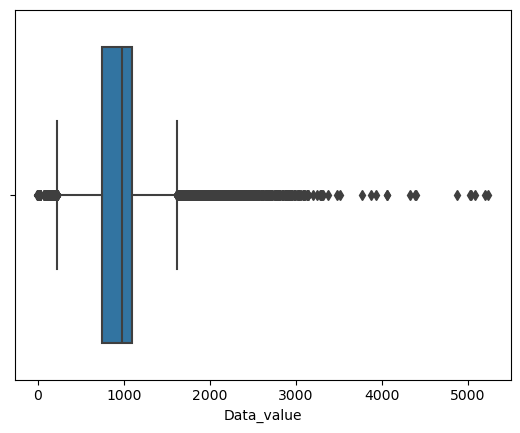

In [27]:
# plot the box and whisker for Data_value column of the dataset
sns.boxplot(x = dataset['Data_value'])
plt.show()




C:\Users\saumi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


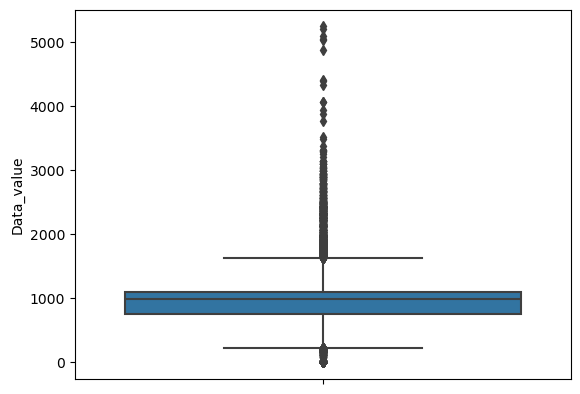

In [28]:
sns.boxplot(y=dataset['Data_value'])
plt.show()


In [29]:
# calculation of first quartile and third quartile
first_q = dataset['Data_value'].quantile(0.25)
third_q = dataset['Data_value'].quantile(0.75)
IQR_1 = third_q - first_q
print("First quartile for Data_value column-Q1: ",first_q)
print("Third quartile for Data_value column-Q3: ",third_q)
print("IQR (Q3-Q1= ", IQR_1)


First quartile for Data_value column-Q1:  745.8800697500001
Third quartile for Data_value column-Q3:  1096.0
IQR (Q3-Q1=  350.1199302499999


In [30]:
# calculate IQR for Data_value column of the dataset
IQR = dataset['Data_value'].quantile(0.75) - dataset['Data_value'].quantile(0.25)
print("IQR for Data_value column = ",IQR)


IQR for Data_value column =  350.1199302499999


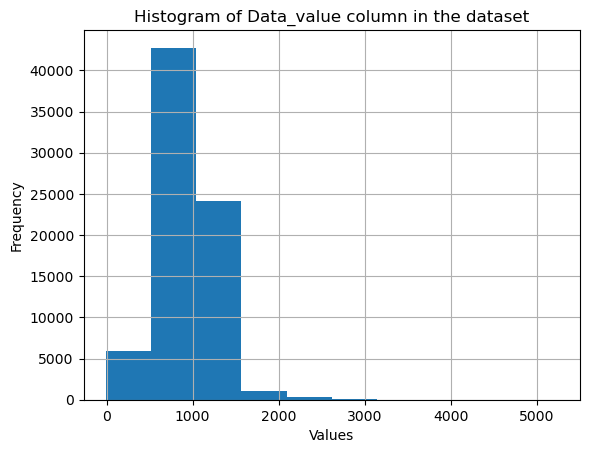

In [31]:
# plot histogram of Data_value column of dataset
dataset.hist(column = 'Data_value')
plt.title('Histogram of Data_value column in the dataset')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()
